# 데이터 출처
* Pima Indians 당뇨병 데이터셋(Pima Indians Diabetes Database)
* 캐글 URL : https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

## 데이터 구성
* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.

# 필요한 라이브러리 로드

In [1]:
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 데이터셋 로드

In [2]:
df = pd.read_csv("diabetes.csv")
df.shape

(768, 9)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 학습, 예측 데이터셋 나누기

* 인슐린 값이 0인 값을 test 세트로 가정하여 예측하기

In [4]:
# label 값을 기준으로 나누기
# 나누기 전에 label 값을 시각화
(df["Insulin"] > 0).value_counts()

True     394
False    374
Name: Insulin, dtype: int64

In [6]:
# train 세트 만들기 (0이 아닌 값)
train = df[df["Insulin"] > 0].copy()
train.shape

(394, 9)

In [7]:
# test 세트 만들기(0인 값)
test = df[df["Insulin"] == 0].copy()
test.shape

(374, 9)

# 학습, 예측에 사용할 컬럼

In [9]:
# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져온다.
# Insulin 컬럼 제외

feature_names = test.columns.tolist()
feature_names.remove("Insulin")
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

# 정답이자 예측해야 될 값

In [10]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담는다.

label_name = "Insulin"
label_name

'Insulin'

# 학습, 예측 데이터셋 만들기

In [12]:
# 학습 세트 만들기

X_train = train[feature_names]
X_train.shape

(394, 8)

In [13]:
# 정답 값 만들기

y_train = train[label_name]
y_train.shape

(394,)

In [14]:
# 예측에 사용할 test 데이터세트 만들기

X_test = test[feature_names]
X_test.shape

(374, 8)

In [16]:
# 예측의 정답 값

y_test = test[label_name]
y_test.shape

(374,)

# 머신러닝 알고리즘 가져오기

In [20]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)

# 학습(훈련)

* 시험을 볼 때 기출문제(X_train)와 정답(y_train)을 보고 공부하는 과정과 유사

In [21]:
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

# cross validation으로 학습 세트의 오차 측정하기

In [24]:
from sklearn.model_selection import cross_val_predict

y_predict = cross_val_predict(model, X_train, y_train, cv=5, n_jobs=-1, verbose=2)
y_predict[:5]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


array([ 25., 480.,  55., 145., 495.])

In [25]:
# 분류 알고리즘처럼 정답을 정확하게 맞춘 개수 구하기
# 회귀의 경우 특정한 정수값으로 예측하는 것이 아니기 때문에 정답 개수가 현저히 낮을 수 있음.
(y_predict == y_train).sum()

3

C:\Users\ksh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Insulin'>

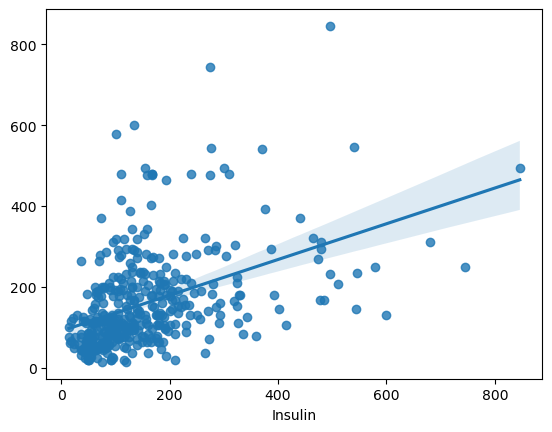

In [27]:
# rdgplot으로 결과 값 비교

sns.regplot(y_train, y_predict)

# x축이 정답값(y_train), y축이 예측값(y_predict)
# 회귀선에 예측값과 정답값이 붙어 있을수록 정확하나, 200 이상이상치 많다.

In [29]:
# r2_score 구하기

from sklearn.metrics import r2_score

r2_score(y_train, y_predict)

# r2_score가 1에 가까워야지 정확

-0.14429295602725567

C:\Users\ksh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ksh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

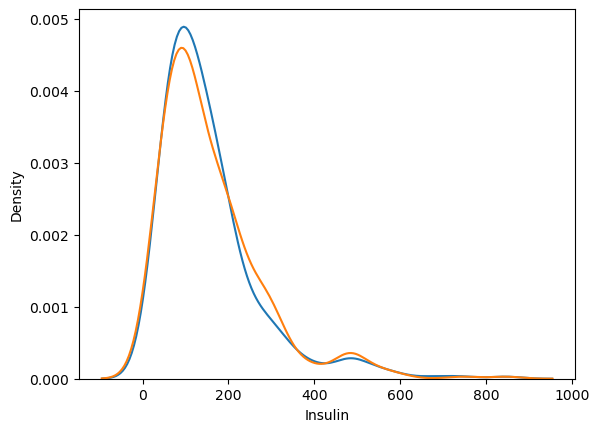

In [32]:
# distplot으로 정답값과 예측값의 분포 그리기

sns.distplot(y_train, hist=False, label="train")
sns.distplot(y_predict, hist=False, label="predict")

# 대체로 비슷하게 그려졌으나 약 500에서 두 그래프가 다르게 그려짐

# 오차 구하기

In [36]:
# MAE

error = abs(y_train - y_predict)
error.mean()

86.57106598984771

C:\Users\ksh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

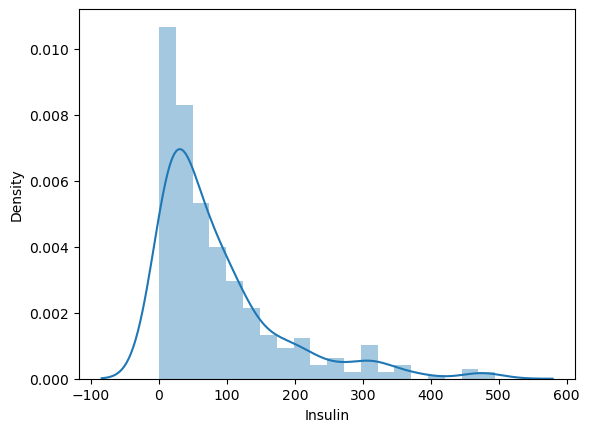

In [37]:
# 오차(정답값-예측값)의 분포 그래프로
sns.distplot(error)

# 오차가 100이하인 값들이 많고 오차가 큰 값들은 존재하나 수가 적음